# Train model with Chroma Feature (24 feature)

### Buzz 1

#### load data

In [1]:
import numpy as np

# Load the arrays
Noneswarming_train_buzz_1_chroma = np.load("Train_buzz_1_chroma/Noneswarming_train.npy")
Swarming_train_buzz_1_chroma = np.load("Train_buzz_1_chroma/Swarming_train.npy")
Noneswarming_test_buzz_1_chroma = np.load("Test_buzz_1_chroma/Noneswarming_test.npy")
Swarming_test_buzz_1_chroma = np.load("Test_buzz_1_chroma/Swarming_test.npy")
Noneswarming_val_buzz_1_chroma = np.load("Val_buzz_1_chroma/Noneswarming_val.npy")
Swarming_val_buzz_1_chroma = np.load("Val_buzz_1_chroma/Swarming_val.npy")


In [2]:
train_data_buzz_1_chroma = np.vstack([Noneswarming_train_buzz_1_chroma, Swarming_train_buzz_1_chroma])
train_labels_buzz_1_chroma = np.array([0] * Noneswarming_train_buzz_1_chroma.shape[0] + [1] * Swarming_train_buzz_1_chroma.shape[0])

val_data_buzz_1_chroma = np.vstack([Noneswarming_val_buzz_1_chroma, Swarming_val_buzz_1_chroma])
val_labels_buzz_1_chroma = np.array([0] * Noneswarming_val_buzz_1_chroma.shape[0] + [1] * Swarming_val_buzz_1_chroma.shape[0])

test_data_buzz_1_chroma = np.vstack([Noneswarming_test_buzz_1_chroma, Swarming_test_buzz_1_chroma])
test_labels_buzz_1_chroma = np.array([0] * Noneswarming_test_buzz_1_chroma.shape[0] + [1] * Swarming_test_buzz_1_chroma.shape[0])

# 1DCNN

In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(24, 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(256, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data_buzz_1_chroma,train_labels_buzz_1_chroma, epochs=10, batch_size=32, validation_data=(val_data_buzz_1_chroma,val_labels_buzz_1_chroma))

Epoch 1/10
731/731 [==============================] - 11s 10ms/step - loss: 0.1734 - accuracy: 0.9307 - val_loss: 1.4059 - val_accuracy: 0.4985
Epoch 2/10
731/731 [==============================] - 6s 8ms/step - loss: 0.1081 - accuracy: 0.9567 - val_loss: 0.7299 - val_accuracy: 0.6694
Epoch 3/10
731/731 [==============================] - 6s 8ms/step - loss: 0.0902 - accuracy: 0.9634 - val_loss: 1.2434 - val_accuracy: 0.5403
Epoch 4/10
731/731 [==============================] - 5s 7ms/step - loss: 0.0821 - accuracy: 0.9663 - val_loss: 1.2644 - val_accuracy: 0.5274
Epoch 5/10
731/731 [==============================] - 5s 6ms/step - loss: 0.0734 - accuracy: 0.9703 - val_loss: 0.9809 - val_accuracy: 0.5632
Epoch 6/10
731/731 [==============================] - 5s 7ms/step - loss: 0.0700 - accuracy: 0.9728 - val_loss: 1.3814 - val_accuracy: 0.5714
Epoch 7/10
731/731 [==============================] - 5s 7ms/step - loss: 0.0663 - accuracy: 0.9725 - val_loss: 1.4278 - val_accuracy: 0.5274
Epoc

In [4]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data_buzz_1_chroma , test_labels_buzz_1_chroma)

print(f'Test accuracy: {test_acc}')

400/400 [==============================] - 1s 3ms/step - loss: 1.2068 - accuracy: 0.6241
Test accuracy: 0.6241289973258972


400/400 [==============================] - 1s 2ms/step


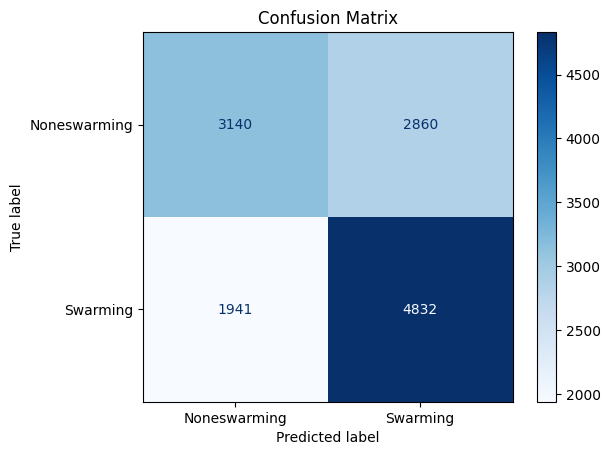

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(test_data_buzz_1_chroma)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_1_chroma, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# RNN/LSTM

In [6]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model2 = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(24, 1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(train_data_buzz_1_chroma ,train_labels_buzz_1_chroma, epochs=10, batch_size=32, validation_data=(val_data_buzz_1_chroma,val_labels_buzz_1_chroma))

Epoch 1/10
731/731 [==============================] - 92s 99ms/step - loss: 0.3730 - accuracy: 0.8061 - val_loss: 0.6970 - val_accuracy: 0.5453
Epoch 2/10
731/731 [==============================] - 69s 94ms/step - loss: 0.3142 - accuracy: 0.8415 - val_loss: 0.7963 - val_accuracy: 0.5451
Epoch 3/10
731/731 [==============================] - 58s 79ms/step - loss: 0.2183 - accuracy: 0.9025 - val_loss: 0.7273 - val_accuracy: 0.6377
Epoch 4/10
731/731 [==============================] - 58s 79ms/step - loss: 0.1873 - accuracy: 0.9187 - val_loss: 0.8277 - val_accuracy: 0.6313
Epoch 5/10
731/731 [==============================] - 67s 91ms/step - loss: 0.1656 - accuracy: 0.9316 - val_loss: 0.6553 - val_accuracy: 0.6091
Epoch 6/10
731/731 [==============================] - 54s 73ms/step - loss: 0.1596 - accuracy: 0.9321 - val_loss: 0.7054 - val_accuracy: 0.6942
Epoch 7/10
731/731 [==============================] - 61s 83ms/step - loss: 0.1410 - accuracy: 0.9392 - val_loss: 0.8185 - val_accuracy:

In [8]:
# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_data_buzz_1_chroma , test_labels_buzz_1_chroma)

print(f'Test accuracy: {test_acc}')

400/400 [==============================] - 16s 38ms/step - loss: 0.7746 - accuracy: 0.6884
Test accuracy: 0.6884052157402039


400/400 [==============================] - 19s 39ms/step


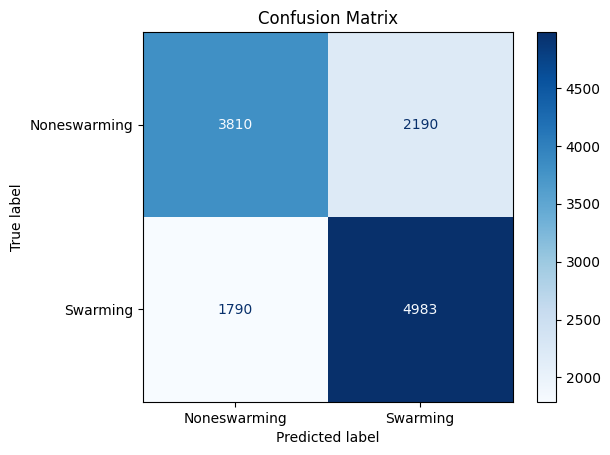

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model2.predict(test_data_buzz_1_chroma)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_1_chroma, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(train_data_buzz_1_chroma, train_labels_buzz_1_chroma)
val_predictions = rf_classifier.predict(val_data_buzz_1_chroma)

# Calculate the accuracy on the validation set
val_accuracy_rf = accuracy_score(val_labels_buzz_1_chroma, val_predictions)
print("Validation Accuracy:", val_accuracy_rf)
# Predictions on the test set
rf_predictions = rf_classifier.predict(test_data_buzz_1_chroma)
test_accuracy_rf = accuracy_score(test_labels_buzz_1_chroma, rf_predictions)
print(f'Random Forest Accuracy: {test_accuracy_rf}')

# Display confusion matrix and classification report
print(confusion_matrix(test_labels_buzz_1_chroma, rf_predictions))
print(classification_report(test_labels_buzz_1_chroma, rf_predictions))

Validation Accuracy: 0.5224251019322815
Random Forest Accuracy: 0.5371486729820716
[[3464 2536]
 [3376 3397]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.54      6000
           1       0.57      0.50      0.53      6773

    accuracy                           0.54     12773
   macro avg       0.54      0.54      0.54     12773
weighted avg       0.54      0.54      0.54     12773



# KNN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_classifier.fit(train_data_buzz_1_chroma, train_labels_buzz_1_chroma)

# Predictions on the validation set
val_predictions_knn = knn_classifier.predict(val_data_buzz_1_chroma)

# Calculate the accuracy on the validation set for KNN
val_accuracy_knn = accuracy_score(val_labels_buzz_1_chroma, val_predictions_knn)
print("Validation Accuracy (KNN):", val_accuracy_knn)

# Predictions on the test set for KNN
knn_predictions = knn_classifier.predict(test_data_buzz_1_chroma)
test_accuracy_knn = accuracy_score(test_labels_buzz_1_chroma, knn_predictions)
print(f'KNN Accuracy: {test_accuracy_knn}')

# Display confusion matrix and classification report for KNN
print(confusion_matrix(test_labels_buzz_1_chroma, knn_predictions))
print(classification_report(test_labels_buzz_1_chroma, knn_predictions))

Validation Accuracy (KNN): 0.5959936181528098
KNN Accuracy: 0.6176309402646207
[[4048 1952]
 [2932 3841]]
              precision    recall  f1-score   support

           0       0.58      0.67      0.62      6000
           1       0.66      0.57      0.61      6773

    accuracy                           0.62     12773
   macro avg       0.62      0.62      0.62     12773
weighted avg       0.62      0.62      0.62     12773



# SVM

In [11]:
from sklearn.svm import SVC
# Create an SVM Classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier.fit(train_data_buzz_1_chroma, train_labels_buzz_1_chroma)

# Predictions on the validation set for SVM
val_predictions_svm = svm_classifier.predict(val_data_buzz_1_chroma)

# Calculate the accuracy on the validation set for SVM
val_accuracy_svm = accuracy_score(val_labels_buzz_1_chroma, val_predictions_svm)
print("Validation Accuracy (SVM):", val_accuracy_svm)

# Predictions on the test set for SVM
svm_predictions = svm_classifier.predict(test_data_buzz_1_chroma)
test_accuracy_svm = accuracy_score(test_labels_buzz_1_chroma, svm_predictions)
print(f'SVM Accuracy: {test_accuracy_svm}')

# Display confusion matrix and classification report for SVM
print(confusion_matrix(test_labels_buzz_1_chroma, svm_predictions))
print(classification_report(test_labels_buzz_1_chroma, svm_predictions))

Validation Accuracy (SVM): 0.7452579329906045
SVM Accuracy: 0.6395521803804901
[[4316 1684]
 [2920 3853]]
              precision    recall  f1-score   support

           0       0.60      0.72      0.65      6000
           1       0.70      0.57      0.63      6773

    accuracy                           0.64     12773
   macro avg       0.65      0.64      0.64     12773
weighted avg       0.65      0.64      0.64     12773



# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Classifier
logreg_classifier = LogisticRegression()

# Fit the Logistic Regression model
logreg_classifier.fit(train_data_buzz_1_chroma, train_labels_buzz_1_chroma)

# Predictions on the validation set for Logistic Regression
val_predictions_logreg = logreg_classifier.predict(val_data_buzz_1_chroma)

# Calculate the accuracy on the validation set for Logistic Regression
val_accuracy_logreg = accuracy_score(val_labels_buzz_1_chroma, val_predictions_logreg)
print("Validation Accuracy (Logistic Regression):", val_accuracy_logreg)

# Predictions on the test set for Logistic Regression
logreg_predictions = logreg_classifier.predict(test_data_buzz_1_chroma)
test_accuracy_logreg = accuracy_score(test_labels_buzz_1_chroma, logreg_predictions)
print(f'Logistic Regression Accuracy: {test_accuracy_logreg}')

# Display confusion matrix and classification report for Logistic Regression
print(confusion_matrix(test_labels_buzz_1_chroma, logreg_predictions))
print(classification_report(test_labels_buzz_1_chroma, logreg_predictions))

Validation Accuracy (Logistic Regression): 0.700585002659103
Logistic Regression Accuracy: 0.6318797463399358
[[4070 1930]
 [2772 4001]]
              precision    recall  f1-score   support

           0       0.59      0.68      0.63      6000
           1       0.67      0.59      0.63      6773

    accuracy                           0.63     12773
   macro avg       0.63      0.63      0.63     12773
weighted avg       0.64      0.63      0.63     12773



### Buzz 2

#### load data

In [13]:
Noneswarming_train_buzz_2_chroma = np.load("Train_buzz_2_chroma/Noneswarming_train.npy")
Swarming_train_buzz_2_chroma = np.load("Train_buzz_2_chroma/Swarming_train.npy")
Noneswarming_test_buzz_2_chroma = np.load("Test_buzz_2_chroma/Noneswarming_test.npy")
Swarming_test_buzz_2_chroma = np.load("Test_buzz_2_chroma/Swarming_test.npy")
Noneswarming_val_buzz_2_chroma = np.load("Val_buzz_2_chroma/Noneswarming_val.npy")
Swarming_val_buzz_2_chroma = np.load("Val_buzz_2_chroma/Swarming_val.npy")

In [14]:
train_data_buzz_2_chroma = np.vstack([Noneswarming_train_buzz_2_chroma, Swarming_train_buzz_2_chroma])
train_labels_buzz_2_chroma = np.array([0] * Noneswarming_train_buzz_2_chroma.shape[0] + [1] * Swarming_train_buzz_2_chroma.shape[0])

val_data_buzz_2_chroma = np.vstack([Noneswarming_val_buzz_2_chroma, Swarming_val_buzz_2_chroma])
val_labels_buzz_2_chroma = np.array([0] * Noneswarming_val_buzz_2_chroma.shape[0] + [1] * Swarming_val_buzz_2_chroma.shape[0])

test_data_buzz_2_chroma = np.vstack([Noneswarming_test_buzz_2_chroma, Swarming_test_buzz_2_chroma])
test_labels_buzz_2_chroma = np.array([0] * Noneswarming_test_buzz_2_chroma.shape[0] + [1] * Swarming_test_buzz_2_chroma.shape[0])

# 1DCNN

In [15]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model3 = keras.Sequential([
    keras.layers.Conv1D(64, 3, activation='relu', input_shape=(24, 1)),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(128, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Conv1D(256, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model3.fit(train_data_buzz_2_chroma ,train_labels_buzz_2_chroma, epochs=10, batch_size=32, validation_data=(val_data_buzz_2_chroma,val_labels_buzz_2_chroma))

Epoch 1/10
773/773 [==============================] - 11s 9ms/step - loss: 0.2968 - accuracy: 0.8731 - val_loss: 1.8614 - val_accuracy: 0.4069
Epoch 2/10
773/773 [==============================] - 6s 7ms/step - loss: 0.2012 - accuracy: 0.9207 - val_loss: 2.1062 - val_accuracy: 0.4401
Epoch 3/10
773/773 [==============================] - 6s 7ms/step - loss: 0.1759 - accuracy: 0.9319 - val_loss: 1.8630 - val_accuracy: 0.4608
Epoch 4/10
773/773 [==============================] - 6s 8ms/step - loss: 0.1629 - accuracy: 0.9354 - val_loss: 1.7927 - val_accuracy: 0.4667
Epoch 5/10
773/773 [==============================] - 6s 8ms/step - loss: 0.1497 - accuracy: 0.9400 - val_loss: 1.6686 - val_accuracy: 0.5074
Epoch 6/10
773/773 [==============================] - 6s 8ms/step - loss: 0.1367 - accuracy: 0.9459 - val_loss: 1.5993 - val_accuracy: 0.5018
Epoch 7/10
773/773 [==============================] - 6s 8ms/step - loss: 0.1304 - accuracy: 0.9472 - val_loss: 1.4813 - val_accuracy: 0.5189
Epoch

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model3.evaluate(test_data_buzz_2_chroma , test_labels_buzz_2_chroma)

print(f'Test accuracy: {test_acc}')

362/362 [==============================] - 1s 4ms/step - loss: 0.1816 - accuracy: 0.9302
Test accuracy: 0.9301943778991699


362/362 [==============================] - 1s 2ms/step


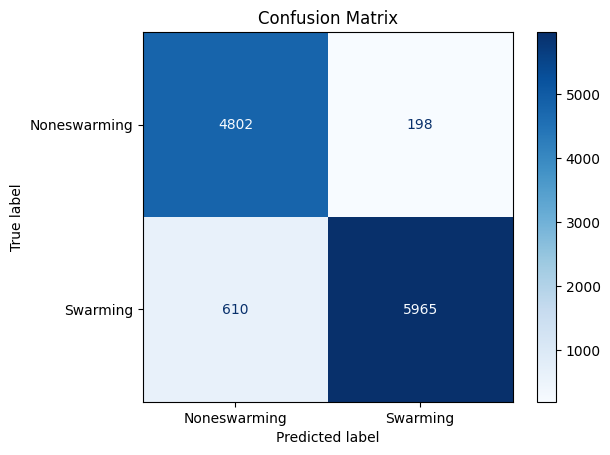

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model3.predict(test_data_buzz_2_chroma)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_2_chroma, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# RNN/LSTM

In [19]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np

model4 = keras.Sequential([
    keras.layers.LSTM(64, return_sequences=True, input_shape=(24, 1)),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(256),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model4.fit(train_data_buzz_2_chroma ,train_labels_buzz_2_chroma, epochs=10, batch_size=32, validation_data=(val_data_buzz_2_chroma,val_labels_buzz_2_chroma))
model4.summary()

Epoch 1/10
773/773 [==============================] - 94s 100ms/step - loss: 0.4823 - accuracy: 0.7484 - val_loss: 1.0965 - val_accuracy: 0.4745
Epoch 2/10
773/773 [==============================] - 77s 99ms/step - loss: 0.3309 - accuracy: 0.8572 - val_loss: 1.3038 - val_accuracy: 0.4248
Epoch 3/10
773/773 [==============================] - 73s 95ms/step - loss: 0.2897 - accuracy: 0.8764 - val_loss: 1.2453 - val_accuracy: 0.4474
Epoch 4/10
773/773 [==============================] - 70s 90ms/step - loss: 0.2753 - accuracy: 0.8837 - val_loss: 1.7888 - val_accuracy: 0.4825
Epoch 5/10
773/773 [==============================] - 69s 89ms/step - loss: 0.2637 - accuracy: 0.8897 - val_loss: 1.9206 - val_accuracy: 0.5100
Epoch 6/10
773/773 [==============================] - 69s 89ms/step - loss: 0.2505 - accuracy: 0.8945 - val_loss: 1.3476 - val_accuracy: 0.4858
Epoch 7/10
773/773 [==============================] - 71s 91ms/step - loss: 0.2461 - accuracy: 0.8970 - val_loss: 1.5190 - val_accuracy

In [21]:
# Evaluate the model on the test set
test_loss, test_acc = model4.evaluate(test_data_buzz_2_chroma , test_labels_buzz_2_chroma)

print(f'Test accuracy: {test_acc}')

362/362 [==============================] - 15s 41ms/step - loss: 0.1577 - accuracy: 0.9349
Test accuracy: 0.9349460005760193


362/362 [==============================] - 14s 39ms/step


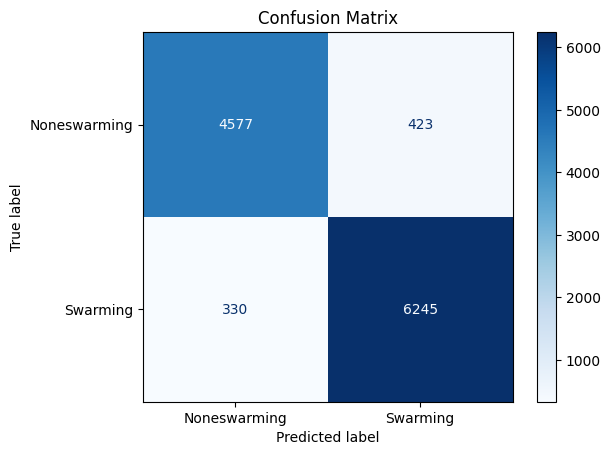

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model4.predict(test_data_buzz_2_chroma)
rounded_predictions = np.round(predictions)

# Calculate confusion matrix
cm = confusion_matrix(test_labels_buzz_2_chroma, rounded_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Noneswarming", "Swarming"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Random Forest Classifier
rf_classifier_2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier_2.fit(train_data_buzz_2_chroma, train_labels_buzz_2_chroma)
val_predictions_2 = rf_classifier_2.predict(val_data_buzz_2_chroma)

# Calculate the accuracy on the validation set
val_accuracy_rf_2 = accuracy_score(val_labels_buzz_2_chroma, val_predictions_2)
print("Validation Accuracy:", val_accuracy_rf_2)
# Predictions on the test set
rf_predictions_2 = rf_classifier_2.predict(test_data_buzz_2_chroma)
test_accuracy_rf_2 = accuracy_score(test_labels_buzz_2_chroma, rf_predictions_2)
print(f'Random Forest Accuracy: {test_accuracy_rf_2}')

# Display confusion matrix and classification report
print(confusion_matrix(test_labels_buzz_2_chroma, rf_predictions_2))
print(classification_report(test_labels_buzz_2_chroma, rf_predictions_2))

Validation Accuracy: 0.47046363850317724
Random Forest Accuracy: 0.9464362850971922
[[4692  308]
 [ 312 6263]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5000
           1       0.95      0.95      0.95      6575

    accuracy                           0.95     11575
   macro avg       0.95      0.95      0.95     11575
weighted avg       0.95      0.95      0.95     11575



# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN Classifier
knn_classifier_2 = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model
knn_classifier_2.fit(train_data_buzz_2_chroma, train_labels_buzz_2_chroma)

# Predictions on the validation set
val_predictions_knn_2 = knn_classifier.predict(val_data_buzz_2_chroma)

# Calculate the accuracy on the validation set for KNN
val_accuracy_knn_2 = accuracy_score(val_labels_buzz_2_chroma, val_predictions_knn_2)
print("Validation Accuracy (KNN):", val_accuracy_knn_2)

# Predictions on the test set for KNN
knn_predictions_2 = knn_classifier_2.predict(test_data_buzz_2_chroma)
test_accuracy_knn_2 = accuracy_score(test_labels_buzz_2_chroma, knn_predictions_2)
print(f'KNN Accuracy: {test_accuracy_knn_2}')

# Display confusion matrix and classification report for KNN
print(confusion_matrix(test_labels_buzz_2_chroma, knn_predictions_2))
print(classification_report(test_labels_buzz_2_chroma, knn_predictions_2))

Validation Accuracy (KNN): 0.6879265709578725
KNN Accuracy: 0.9141252699784017
[[4698  302]
 [ 692 5883]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      5000
           1       0.95      0.89      0.92      6575

    accuracy                           0.91     11575
   macro avg       0.91      0.92      0.91     11575
weighted avg       0.92      0.91      0.91     11575



# SVM

In [25]:
from sklearn.svm import SVC
# Create an SVM Classifier
svm_classifier_2 = SVC(kernel='linear', C=1.0)

# Fit the SVM model
svm_classifier_2.fit(train_data_buzz_2_chroma, train_labels_buzz_2_chroma)

# Predictions on the validation set for SVM
val_predictions_svm_2 = svm_classifier_2.predict(val_data_buzz_2_chroma)

# Calculate the accuracy on the validation set for SVM
val_accuracy_svm_2 = accuracy_score(val_labels_buzz_2_chroma, val_predictions_svm_2)
print("Validation Accuracy (SVM):", val_accuracy_svm_2)

# Predictions on the test set for SVM
svm_predictions_2 = svm_classifier_2.predict(test_data_buzz_2_chroma)
test_accuracy_svm_2 = accuracy_score(test_labels_buzz_2_chroma, svm_predictions_2)
print(f'SVM Accuracy: {test_accuracy_svm_2}')

# Display confusion matrix and classification report for SVM
print(confusion_matrix(test_labels_buzz_2_chroma, svm_predictions_2))
print(classification_report(test_labels_buzz_2_chroma, svm_predictions_2))

Validation Accuracy (SVM): 0.4189220993174865
SVM Accuracy: 0.904622030237581
[[4133  867]
 [ 237 6338]]
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      5000
           1       0.88      0.96      0.92      6575

    accuracy                           0.90     11575
   macro avg       0.91      0.90      0.90     11575
weighted avg       0.91      0.90      0.90     11575



# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression Classifier
logreg_classifier_2 = LogisticRegression()

# Fit the Logistic Regression model
logreg_classifier_2.fit(train_data_buzz_2_chroma, train_labels_buzz_2_chroma)

# Predictions on the validation set for Logistic Regression
val_predictions_logreg_2 = logreg_classifier_2.predict(val_data_buzz_2_chroma)

# Calculate the accuracy on the validation set for Logistic Regression
val_accuracy_logreg_2 = accuracy_score(val_labels_buzz_2_chroma, val_predictions_logreg_2)
print("Validation Accuracy (Logistic Regression):", val_accuracy_logreg_2)

# Predictions on the test set for Logistic Regression
logreg_predictions_2 = logreg_classifier_2.predict(test_data_buzz_2_chroma)
test_accuracy_logreg_2 = accuracy_score(test_labels_buzz_2_chroma, logreg_predictions_2)
print(f'Logistic Regression Accuracy: {test_accuracy_logreg_2}')

# Display confusion matrix and classification report for Logistic Regression
print(confusion_matrix(test_labels_buzz_2_chroma, logreg_predictions_2))
print(classification_report(test_labels_buzz_2_chroma, logreg_predictions_2))

Validation Accuracy (Logistic Regression): 0.4109202165215345
Logistic Regression Accuracy: 0.905572354211663
[[4048  952]
 [ 141 6434]]
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      5000
           1       0.87      0.98      0.92      6575

    accuracy                           0.91     11575
   macro avg       0.92      0.89      0.90     11575
weighted avg       0.91      0.91      0.90     11575



c:\Users\hoang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
